<h3> Importing libraries <h3>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

<h3> Importing csv file and creating DataFrame <h3>

In [2]:
path = r"C:\Users\lilkl\OneDrive\Plocha\Data Scientist\Projects for GitHub\Data Wrangling\marketing_campaign.csv"
df = pd.read_csv(path, sep = '\t')

<h3> Data Understanding <h3>

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [5]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [6]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
df.shape

(2240, 29)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [10]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


<h3> Data Wrangling <h3>

In [11]:
df.drop_duplicates().reset_index()

,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,...,5,0,0,0,0,0,0,3,11,0
2236,2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,...,7,0,0,0,1,0,0,3,11,0
2237,2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,...,6,0,1,0,0,0,0,3,11,0
2238,2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,...,3,0,0,0,0,0,0,3,11,0


In [12]:
income_mean = df['Income'].mean(axis=0)
df['Income'] = df['Income'].fillna(income_mean)
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [13]:
education_count = df['Education'].value_counts().to_frame()
education_count

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


In [14]:
df.rename(columns={'Year_Birth': 'Year_Of_Birth'}, inplace = True)


In [15]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Dt_Customer'].dtype

dtype('<M8[ns]')

In [16]:
df.drop('AcceptedCmp3', axis=1, inplace=True)

In [17]:
df.isna().sum()

ID                     0
Year_Of_Birth          0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
df.to_csv(r"C:\Users\lilkl\OneDrive\Plocha\Data Scientist\Projects for GitHub\Data Wrangling\df.csv")

<h3> Exploratory data analysis <h3>

In [20]:
print(df.dtypes)

ID                              int64
Year_Of_Birth                   int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContact                   int64
Z_Revenue   

Text(0.5, 0, 'Education')

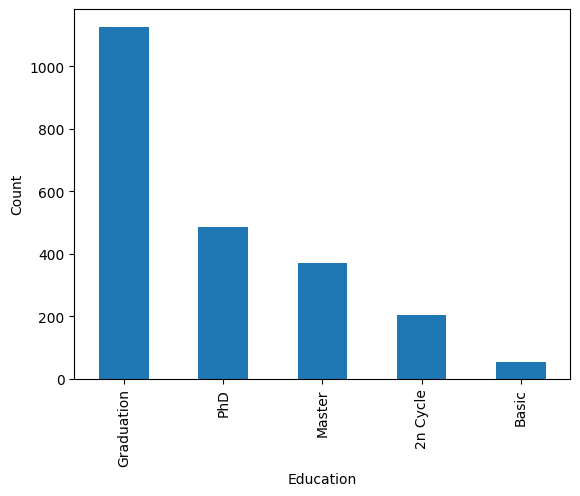

In [21]:
ax = df['Education'].value_counts() \
    .head(10) \
    .plot(kind='bar')
ax.set_ylabel('Count')
ax.set_xlabel('Education')


In [22]:
correlation_matrix = df.corr(numeric_only=True)
correlation_stacked = correlation_matrix.stack()
correlation_df = pd.DataFrame(correlation_stacked, columns=['Correlation'])
correlation_df.reset_index(inplace=True)
correlation_df.columns = ['First_Column', 'Second_Column', 'Correlation']
correlation_df = correlation_df[correlation_df['First_Column'] != correlation_df['Second_Column']]
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)
correlation_df.head(20)

,First_Column,Second_Column,Correlation
330,NumCatalogPurchases,MntMeatProducts,0.723827
198,MntMeatProducts,NumCatalogPurchases,0.723827
153,MntWines,NumStorePurchases,0.642100
351,NumStorePurchases,MntWines,0.642100
328,NumCatalogPurchases,MntWines,0.635226
152,MntWines,NumCatalogPurchases,0.635226
170,MntFruits,MntFishProducts,0.594804
214,MntFishProducts,MntFruits,0.594804
60,Income,NumCatalogPurchases,0.586725
324,NumCatalogPurchases,Income,0.586725


Correlation value: 0.7238265908738769


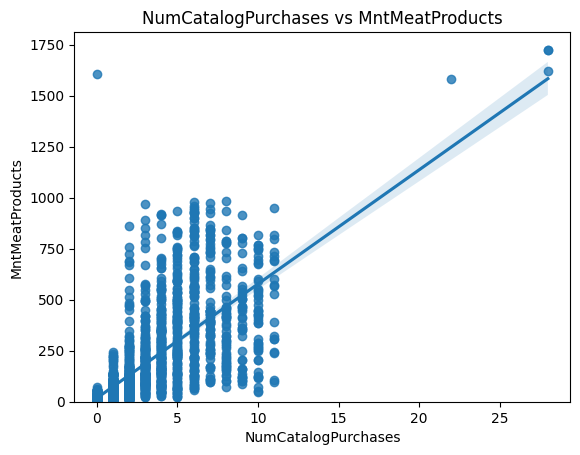

In [23]:
sns.regplot(x='NumCatalogPurchases', y='MntMeatProducts', data=df)
plt.ylim(0,)
plt.title('NumCatalogPurchases vs MntMeatProducts')
print('Correlation value:', df['NumCatalogPurchases'].corr(df['MntMeatProducts']))

Correlation value: 0.6421004382014507


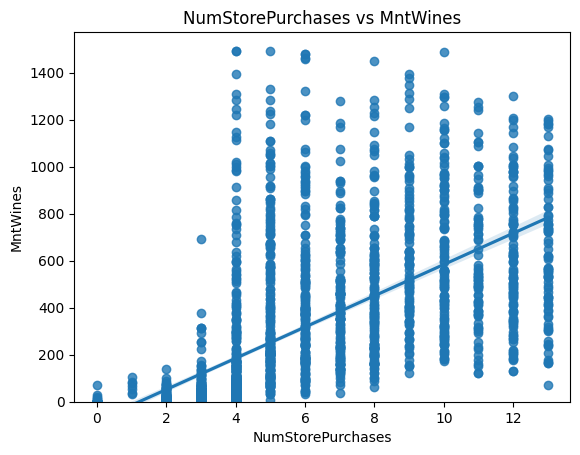

In [24]:
sns.regplot(x='NumStorePurchases', y='MntWines', data=df)
plt.ylim(0,)
plt.title('NumStorePurchases vs MntWines')
print('Correlation value:', df['NumStorePurchases'].corr(df['MntWines']))

Text(0.5, 1.0, 'Education vs Income')

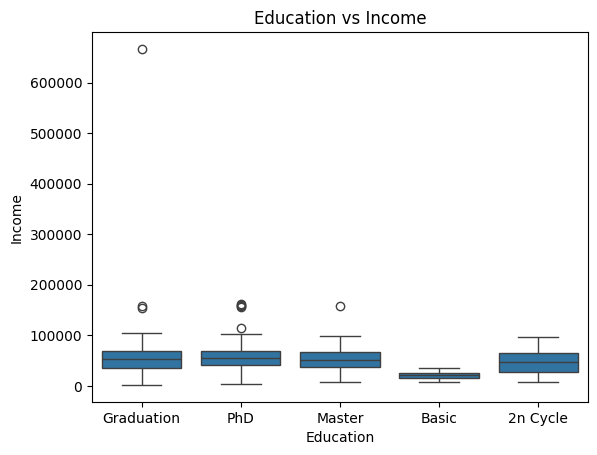

In [25]:
sns.boxplot(x='Education', y='Income', data=df)
plt.title('Education vs Income')


Text(0.5, 1.0, 'Marital Status vs Income')

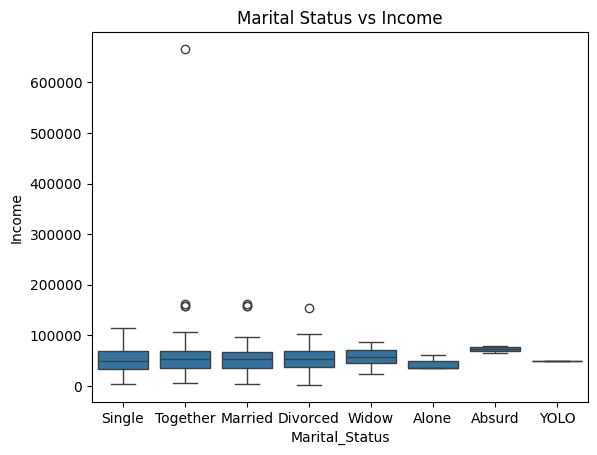

In [26]:
sns.boxplot(x='Marital_Status', y='Income', data=df)
plt.title('Marital Status vs Income')

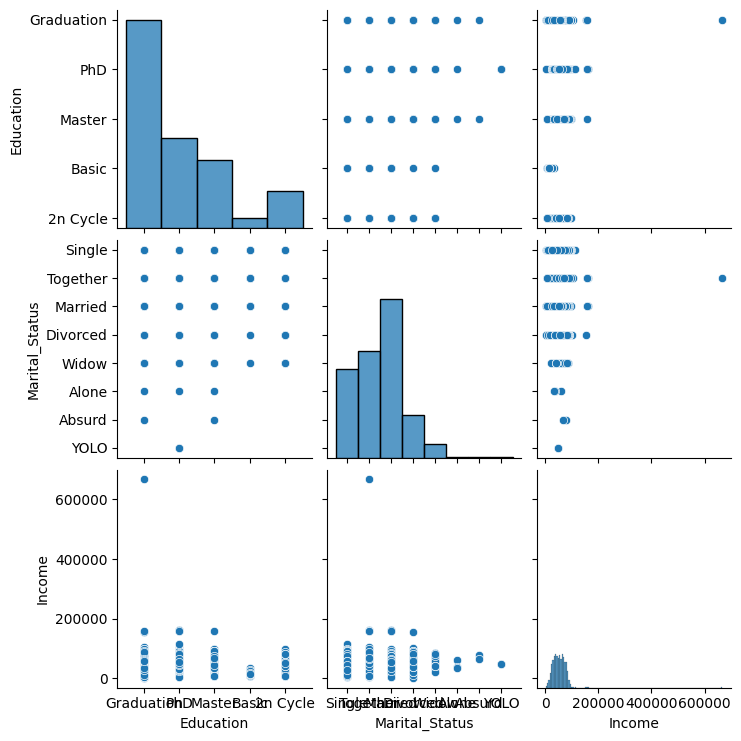

In [27]:
sns.pairplot(df, vars=['Education','Marital_Status','Income'])

In [28]:
grouped_df = df.groupby(['Education','Marital_Status'])['Income'].mean().to_frame()
grouped_df

Income
Education  Marital_Status              
2n Cycle   Divorced        49395.130435
           Married         46275.743844
           Single          53635.385172
           Together        44868.179848
           Widow           51392.200000
Basic      Divorced         9548.000000
           Married         21960.500000
           Single          18238.666667
           Together        21240.071429
           Widow           22123.000000
Graduation Absurd          79244.000000
           Alone           34176.000000
           Divorced        54526.042017
           Married         50813.625879
           Single          51344.208366
           Together        55746.203676
           Widow           54976.657143
Master     Absurd          65487.000000
           Alone           61331.000000
           Divorced        50331.945946
           Married         53286.028986
           Single          53530.560000
           Together        52114.226466
           Widow           57888.687613
PhD        Alone           35860.000000
           Divorced        53096.615385
           Married         58076.669285
           Single          53292.831660
           Together        56008.993601
           Widow           60288.083333
           YOLO            48432.000000

<h2> Regression Models Development <h2>

In [29]:
correlation_df.head(20)

,First_Column,Second_Column,Correlation
330,NumCatalogPurchases,MntMeatProducts,0.723827
198,MntMeatProducts,NumCatalogPurchases,0.723827
153,MntWines,NumStorePurchases,0.642100
351,NumStorePurchases,MntWines,0.642100
328,NumCatalogPurchases,MntWines,0.635226
152,MntWines,NumCatalogPurchases,0.635226
170,MntFruits,MntFishProducts,0.594804
214,MntFishProducts,MntFruits,0.594804
60,Income,NumCatalogPurchases,0.586725
324,NumCatalogPurchases,Income,0.586725


<h4> Simple Linear Regression Model <h4>

In [30]:
# Independent variable: 'NumCatalogPurchases'
# Dependent variable: 'Income'
x_simple = df[['NumCatalogPurchases']]
y = df['Income']

# Splitting the data for Simple Linear Regression Model
x_train_simple, x_test_simple, y_train_simple, y_test_simple = train_test_split(x_simple, y, test_size=0.2, random_state=42)

# Creating the Simple Linear Regression Model
lm = LinearRegression()
lm.fit(x_train_simple,y_train_simple)

# Predicting and evaluating the Simple Linear Regression Model
y_pred_simple = lm.predict(x_test_simple)
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)


Text(0, 0.5, 'Income')

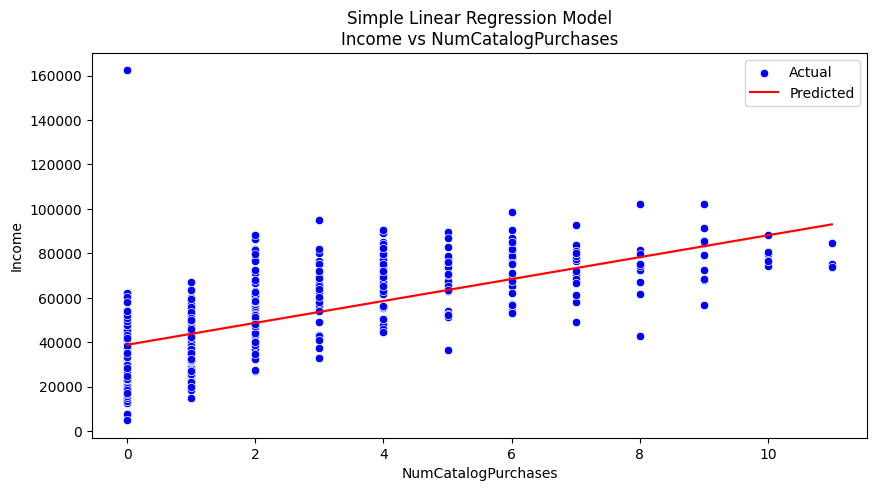

In [31]:
# Simple Linear Regression Model: Scatter Plot and Regression Line
plt.figure(figsize=(10, 5))
sns.scatterplot(x=x_test_simple['NumCatalogPurchases'], y=y_test_simple, color='blue', label='Actual')
sns.lineplot(x=x_test_simple['NumCatalogPurchases'], y=y_pred_simple, color='red', label='Predicted')
plt.title('Simple Linear Regression Model\nIncome vs NumCatalogPurchases')
plt.xlabel('NumCatalogPurchases')
plt.ylabel('Income')

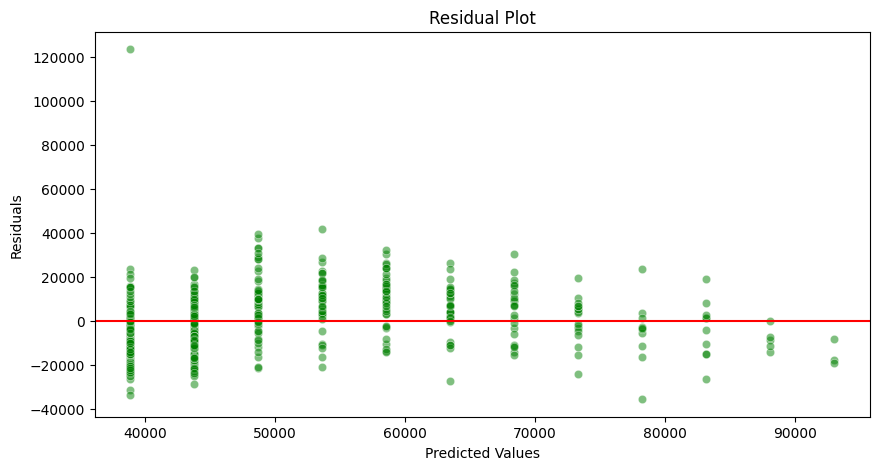

In [32]:
# Calculating residuals for Simple Linear Regression Model
residuals_simple = y_test_simple - y_pred_simple

# Residual Plot for Simple Linear Regression Model
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred_simple, y=residuals_simple, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()



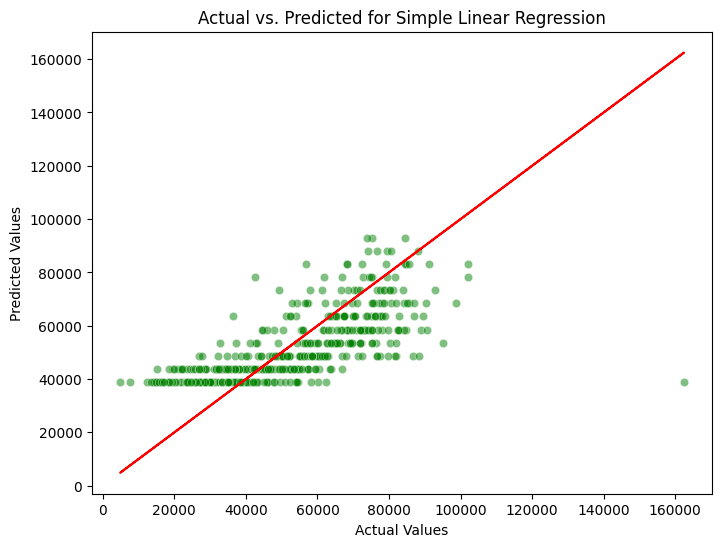

In [33]:
# Actual vs. Predicted plot for the Simple Linear Regression Model
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_simple, y=y_pred_simple, alpha=0.5, color='green')
plt.plot(y_test_simple, y_test_simple, color='red')  # Adding a line representing perfect predictions
plt.title('Actual vs. Predicted for Simple Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


<h3> Multiple Linear Regression <h3>

In [34]:
# Independent variables: 'NumCatalogPurchases', 'MntMeatProducts', 'MntWines'
# Dependent variable: 'Income'
x_multiple = df[['NumCatalogPurchases', 'MntMeatProducts', 'MntWines']]

# Splitting the data for Multiple Linear Regression Model
x_train_multiple, x_test_multiple, y_train_multiple, y_test_multiple = train_test_split(x_multiple, y, test_size=0.2, random_state=42)

# Creating the Multiple Linear Regression Model
lm1 = LinearRegression()
lm1.fit(x_train_multiple,y_train_multiple)

# Predicting and evaluating the Multiple Linear Regression Model
y_pred_multiple = lm1.predict(x_test_multiple)
mse_multiple = mean_squared_error(y_test_multiple,y_pred_multiple)
r2_multiple = r2_score(y_test_multiple,y_pred_multiple)

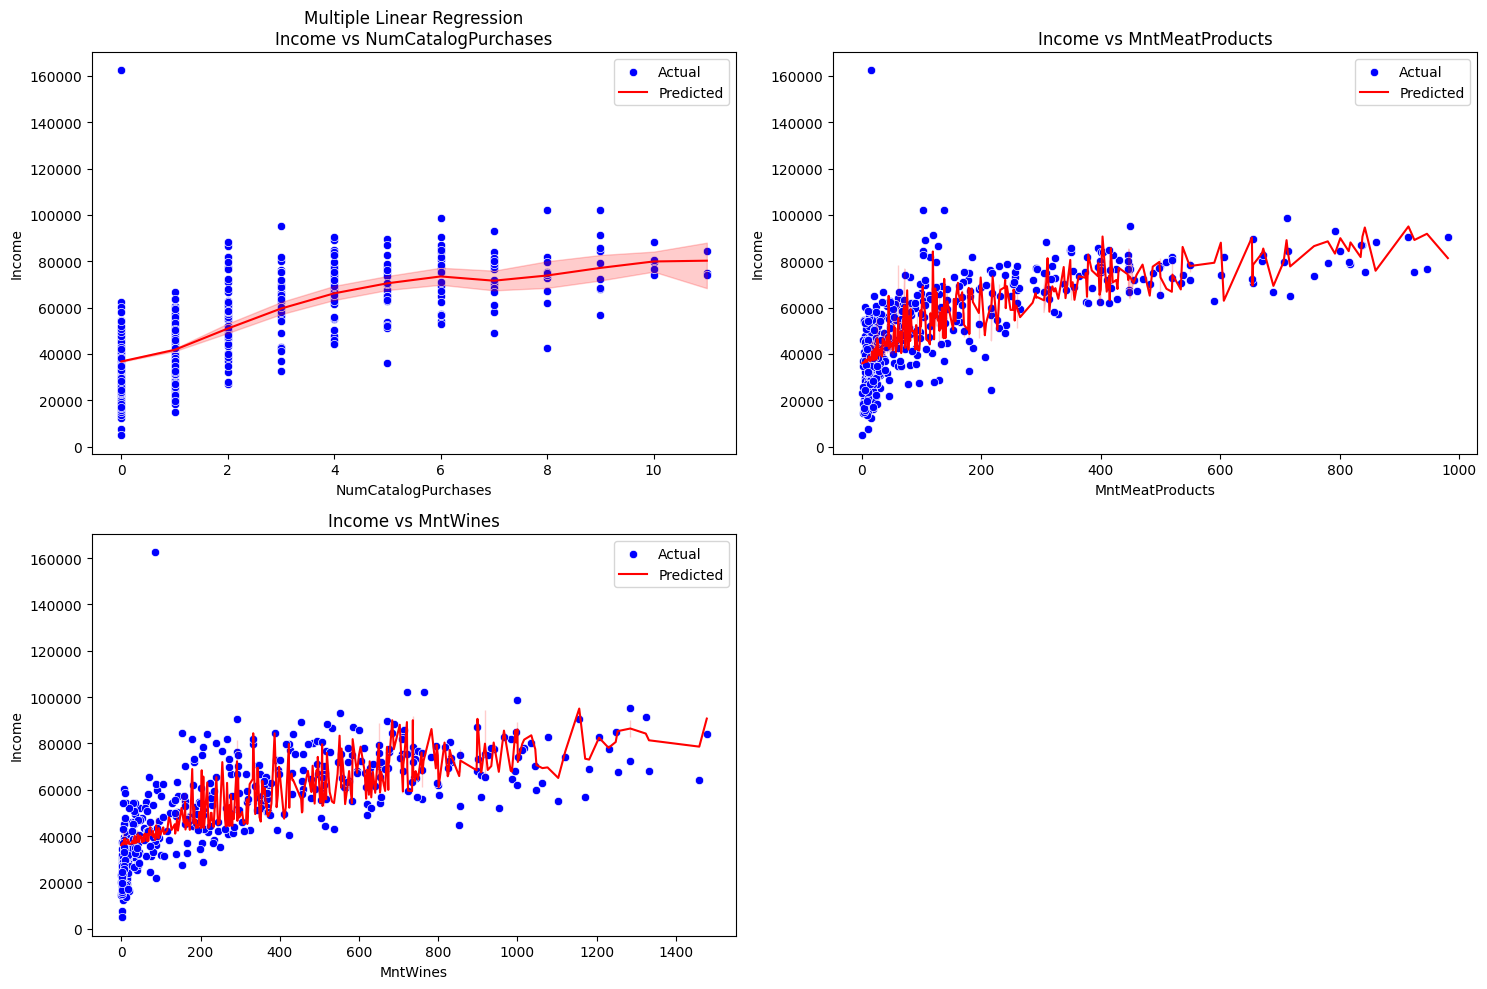

In [35]:
# Multiple Linear Regression: Scatter Plots for each Independent Variable
# Setting up the plotting area
plt.figure(figsize=(15,10))

# Scatter Plot for 'NumCatalogPurchases'
plt.subplot(2, 2, 1)
sns.scatterplot(x=x_test_multiple['NumCatalogPurchases'], y=y_test_multiple, color='blue', label='Actual')
sns.lineplot(x=x_test_multiple['NumCatalogPurchases'], y=y_pred_multiple, color='red', label='Predicted')
plt.title('Multiple Linear Regression\nIncome vs NumCatalogPurchases')
plt.xlabel('NumCatalogPurchases')
plt.ylabel('Income')

# Scatter Plot for 'MntMeatProducts'
plt.subplot(2, 2, 2)
sns.scatterplot(x=x_test_multiple['MntMeatProducts'], y=y_test_multiple, color='blue', label='Actual')
sns.lineplot(x=x_test_multiple['MntMeatProducts'], y=y_pred_multiple, color='red', label='Predicted')
plt.title('Income vs MntMeatProducts')
plt.xlabel('MntMeatProducts')
plt.ylabel('Income')

# Scatter Plot for 'MntWines'
plt.subplot(2, 2, 3)
sns.scatterplot(x=x_test_multiple['MntWines'], y=y_test_multiple, color='blue', label='Actual')
sns.lineplot(x=x_test_multiple['MntWines'], y=y_pred_multiple, color='red', label='Predicted')
plt.title('Income vs MntWines')
plt.xlabel('MntWines')
plt.ylabel('Income')

# Adjust layout
plt.tight_layout()
plt.show()

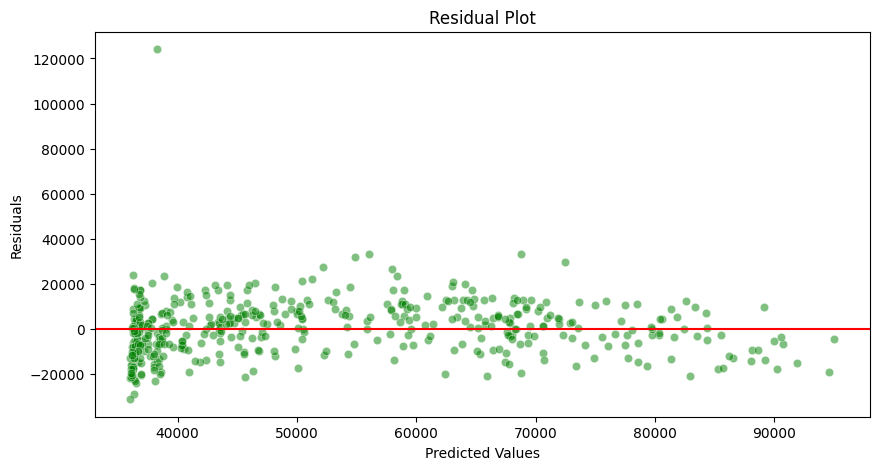

In [36]:
# Calculating residuals for Multiple Linear Regression Model
residuals_multiple = y_test_multiple - y_pred_multiple

# Residual Plot for Multiple Linear Regression Model
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred_multiple, y=residuals_multiple, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

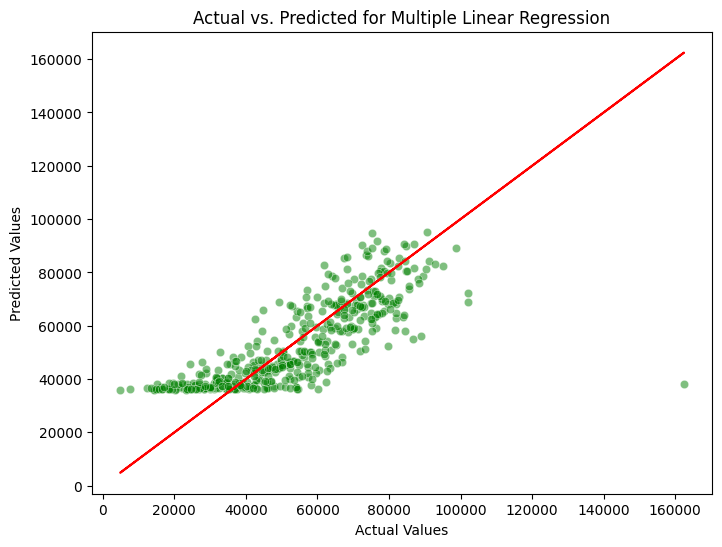

In [37]:
# Actual vs. Predicted plot for the Multiple Linear Regression model
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_multiple, y=y_pred_multiple, alpha=0.5, color='green')
plt.plot(y_test_multiple, y_test_multiple, color='red')  # Adding a line representing perfect predictions
plt.title('Actual vs. Predicted for Multiple Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

<Figure size 1000x500 with 0 Axes>

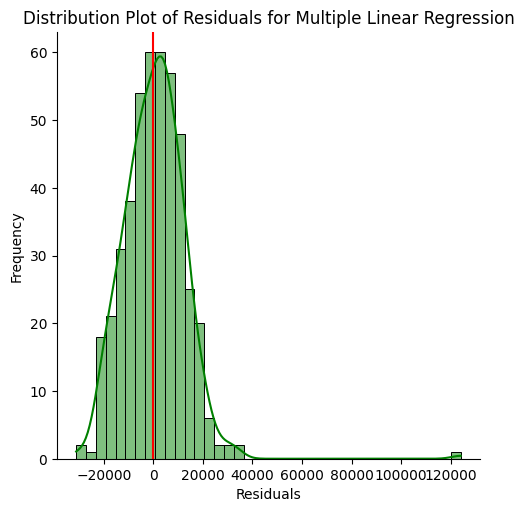

In [38]:
# Calculating residual for Multiple Linear Regression Model
residuals_multiple = y_test_multiple - y_pred_multiple

# Creating a distribution plot for residuals of the Multiple Linear Regression Model
plt.figure(figsize=(10,5))
sns.displot(residuals_multiple, kde=True, color='green')
plt.title('Distribution Plot of Residuals for Multiple Linear Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='-')
plt.show()

<h3> Polynomial Simple Linear Regression <h3>

In [39]:
simple_poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

# Splitting the data and fitting the model for Polynomial Simple Linear Regression Model
x_train_simple_poly, x_test_simple_poly, y_train_simple_poly, y_test_simple_poly = train_test_split(x_simple, y, test_size=0.2, random_state=42)
simple_poly_pipeline.fit(x_train_simple_poly, y_train_simple_poly)

# Predicting and evaluating the model
y_pred_simple_poly = simple_poly_pipeline.predict(x_test_simple_poly)
mse_simple_poly = mean_squared_error(y_test_simple_poly, y_pred_simple_poly)
r2_simple_poly = r2_score(y_test_simple_poly, y_pred_simple_poly)

Text(0, 0.5, 'Income')

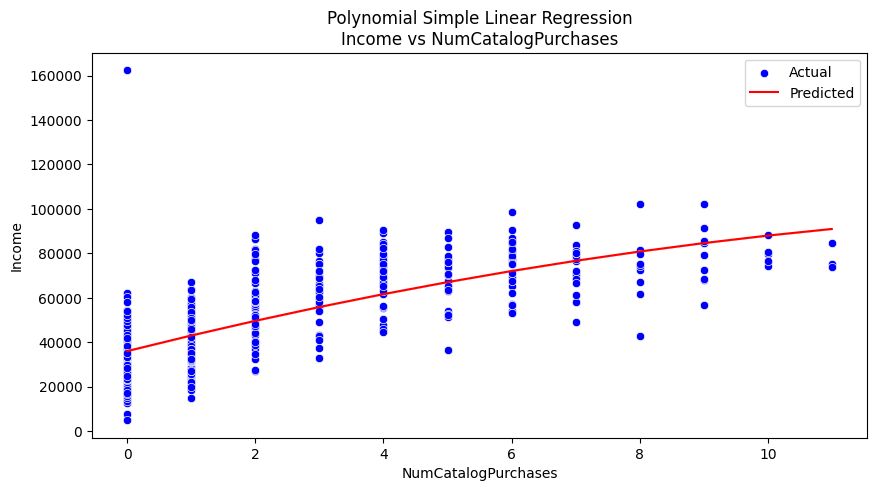

In [40]:
# Polynomial Simple Linear Regression Model: Scatter Plot and Regression Line
plt.figure(figsize=(10,5))
sns.scatterplot(x=x_test_simple_poly['NumCatalogPurchases'], y=y_test_simple_poly, color='blue', label='Actual')
sns.lineplot(x=x_test_simple_poly['NumCatalogPurchases'], y=y_pred_simple_poly, color='red', label='Predicted' )
plt.title('Polynomial Simple Linear Regression\nIncome vs NumCatalogPurchases')
plt.xlabel('NumCatalogPurchases')
plt.ylabel('Income')


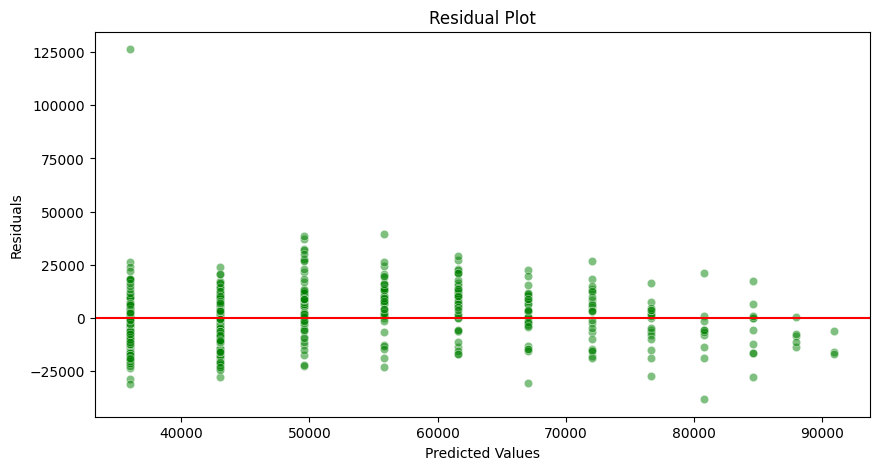

In [41]:
# Calculating residual for Polynomial Simple Linear Regression model
residuals_simple_poly = y_test_simple_poly - y_pred_simple_poly

# Residual Plot for Polynomial Simple Linear Regression model
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred_simple_poly, y=residuals_simple_poly, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

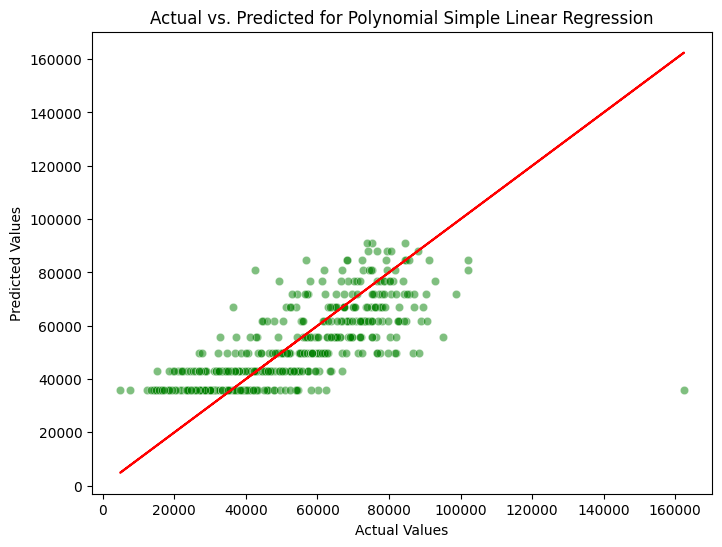

In [42]:
# Actual vs. Predicted plot for the Polynomial Simple Linear Regression model
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_simple_poly, y=y_pred_simple_poly, alpha=0.5, color='green')
plt.plot(y_test_simple_poly, y_test_simple_poly, color='red')  # Adding a line representing perfect predictions
plt.title('Actual vs. Predicted for Polynomial Simple Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

<Figure size 1000x500 with 0 Axes>

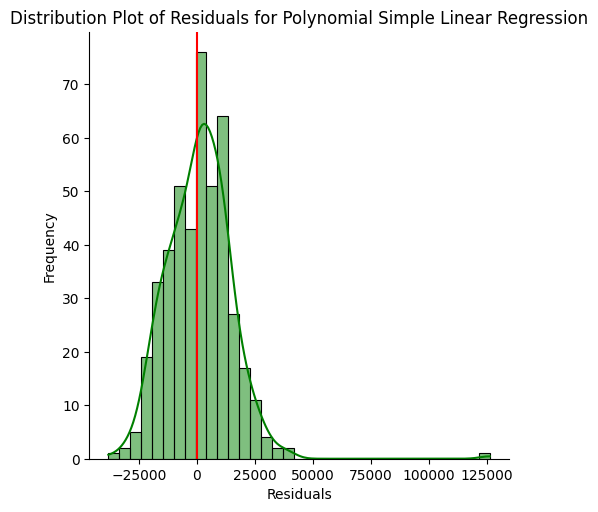

In [43]:
# Calculating residual for Polynomial Simple Linear Regression Model
residuals_multiple = y_test_simple_poly - y_pred_simple_poly

# Creating a distribution plot for residuals of the Polynomial Simple Linear Regression Model
plt.figure(figsize=(10,5))
sns.displot(residuals_multiple, kde=True, color='green')
plt.title('Distribution Plot of Residuals for Polynomial Simple Linear Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='-')
plt.show()

<h3> Polynomial Multiple Linear Regression <h3>

In [44]:
multiple_poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

# Splitting the data and fitting the model for Polynomial Multiple Linear Regression Model
x_train_multiple_poly, x_test_multiple_poly, y_train_multiple_poly, y_test_multiple_poly = train_test_split(x_multiple, y, test_size=0.2, random_state=42)
multiple_poly_pipeline.fit(x_train_multiple_poly, y_train_multiple_poly)

# Predicting and evaluating the model
y_pred_multiple_poly = multiple_poly_pipeline.predict(x_test_multiple_poly)
mse_multiple_poly = mean_squared_error(y_test_multiple_poly, y_pred_multiple_poly)
r2_multiple_poly = r2_score(y_test_multiple_poly, y_pred_multiple_poly)

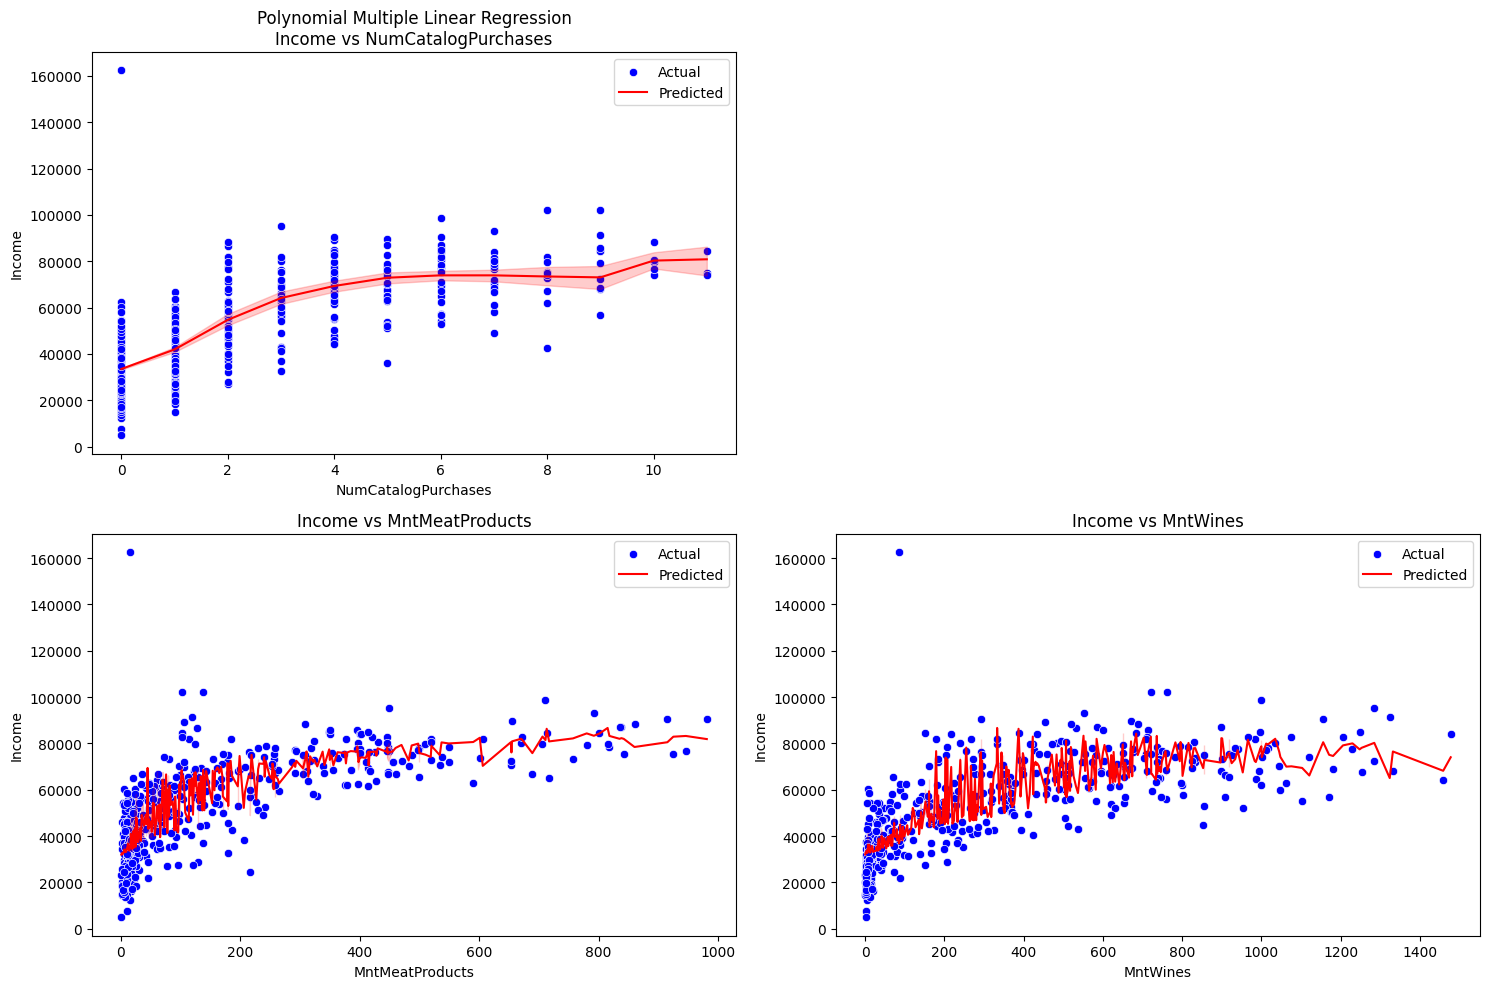

In [45]:
# Polynomial Multiple Linear Regression: Scatter Plots for each Independent Variable
# Setting up the plotting area
plt.figure(figsize=(15,10))

# Scatter Plot for 'NumCatalogPurchases'
plt.subplot(2, 2, 1)
sns.scatterplot(x=x_test_multiple_poly['NumCatalogPurchases'], y=y_test_multiple_poly, color='blue', label='Actual')
sns.lineplot(x=x_test_multiple_poly['NumCatalogPurchases'], y=y_pred_multiple_poly, color='red', label='Predicted')
plt.title('Polynomial Multiple Linear Regression\nIncome vs NumCatalogPurchases')
plt.xlabel('NumCatalogPurchases')
plt.ylabel('Income')

# Scatter Plot for 'MntMeatProducts'
plt.subplot(2, 2, 3)
sns.scatterplot(x=x_test_multiple_poly['MntMeatProducts'], y=y_test_multiple_poly, color='blue', label='Actual')
sns.lineplot(x=x_test_multiple_poly['MntMeatProducts'], y=y_pred_multiple_poly, color='red', label='Predicted')
plt.title('Income vs MntMeatProducts')
plt.xlabel('MntMeatProducts')
plt.ylabel('Income')

# Scatter Plot for 'MntWines'
plt.subplot(2, 2, 4)
sns.scatterplot(x=x_test_multiple_poly['MntWines'], y=y_test_multiple_poly, color='blue', label='Actual')
sns.lineplot(x=x_test_multiple_poly['MntWines'], y=y_pred_multiple_poly, color='red', label='Predicted')
plt.title('Income vs MntWines')
plt.xlabel('MntWines')
plt.ylabel('Income')

# Adjust layout
plt.tight_layout()
plt.show()

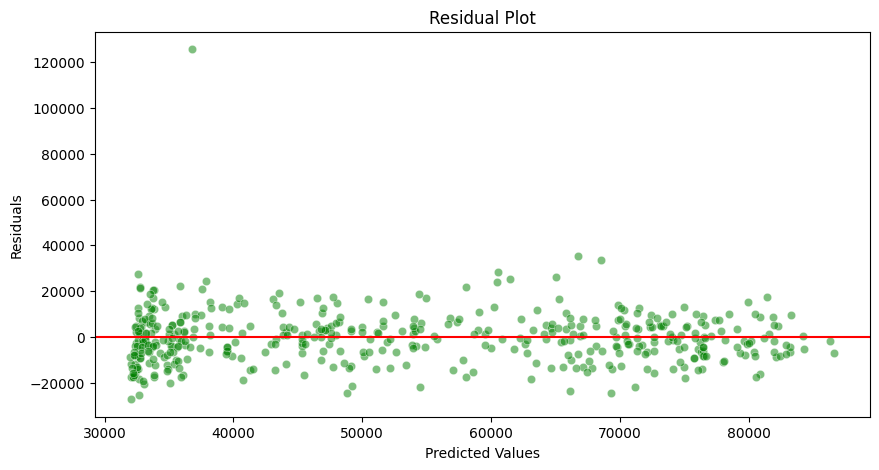

In [46]:
# Calculating residuals for Polynomial Multiple Linear Regression Model
residuals_multiple_poly = y_test_multiple_poly - y_pred_multiple_poly

# Residual Plot for Polynomial Multiple Linear Regression Model
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred_multiple_poly, y=residuals_multiple_poly, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

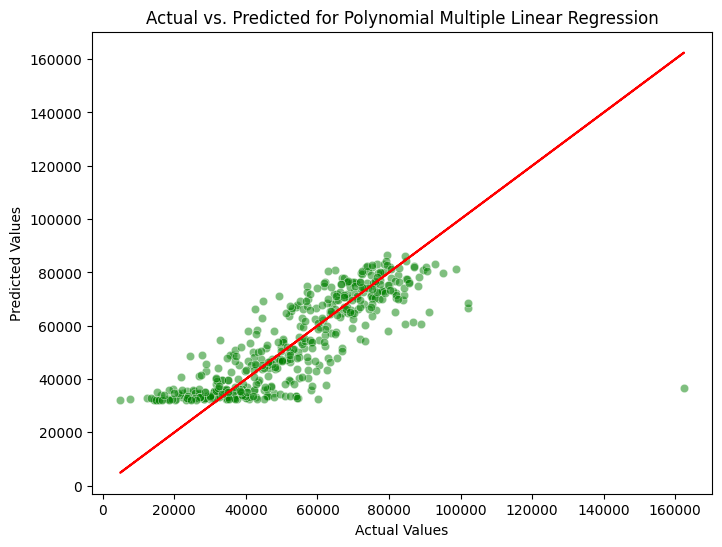

In [47]:
# Actual vs. Predicted plot for the Polynomial Multiple Linear Regression model
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_multiple_poly, y=y_pred_multiple_poly, alpha=0.5, color='green')
plt.plot(y_test_multiple_poly, y_test_multiple_poly, color='red')  # Adding a line representing perfect predictions
plt.title('Actual vs. Predicted for Polynomial Multiple Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

<Figure size 1000x500 with 0 Axes>

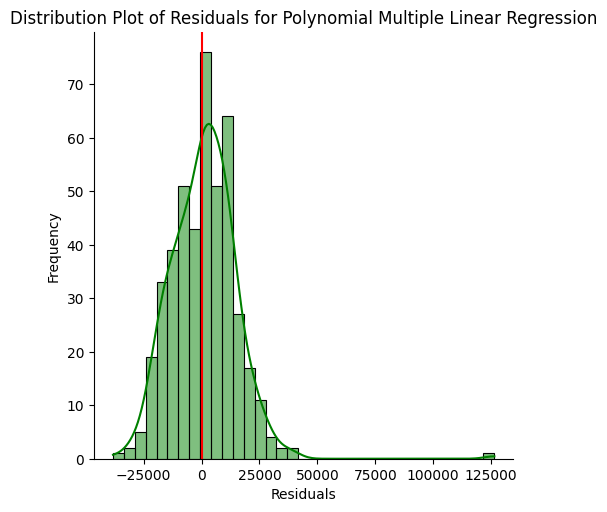

In [48]:
# Calculating residual for Polynomial Multiple Linear Regression Model
residuals_multiple_poly = y_test_simple_poly - y_pred_simple_poly

# Creating a distribution plot for residuals of the Polynomial Multiple Linear Regression Model
plt.figure(figsize=(10,5))
sns.displot(residuals_multiple_poly, kde=True, color='green')
plt.title('Distribution Plot of Residuals for Polynomial Multiple Linear Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='-')
plt.show()

<h4> Evaluation <h4>

In [49]:
print("Mean Squared Error for Simple Linear Regression Model:", mse_simple.round(3))
print("R-squared for Simple Linear Regression Model:", r2_simple.round(3),"\n")
print("Mean Squared Error for Multiple Linear Regression Model:", mse_multiple.round(3))
print("R-squared for Multiple Linear Regression Model:", r2_multiple.round(3),"\n")
print("Mean Squared Error for Polynomial Simple Linear Regression Model:", mse_simple_poly.round(3))
print("R-squared for Polynomial Simple Linear Regression Model:", r2_simple_poly.round(3),"\n")
print("Mean Squared Error for Polynomial Multiple Linear Regression Model:", mse_multiple_poly.round(3))
print("R-squared for Polynomial Multiple Linear Regression Model:", r2_multiple_poly.round(3))

Mean Squared Error for Simple Linear Regression Model: 221564800.755
R-squared for Simple Linear Regression Model: 0.48 

Mean Squared Error for Multiple Linear Regression Model: 158567439.19
R-squared for Multiple Linear Regression Model: 0.628 

Mean Squared Error for Polynomial Simple Linear Regression Model: 203279146.594
R-squared for Polynomial Simple Linear Regression Model: 0.523 

Mean Squared Error for Polynomial Multiple Linear Regression Model: 139784682.03
R-squared for Polynomial Multiple Linear Regression Model: 0.672


The Polynomial Multiple Linear Regression model stands out as the best performer with the lowest MSE value and highest R-squared value.




